In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


**Probelm Statement**:-

Prediction of Graduate Admissions from an Indian perspective for Masters Programs. The parameters included are :

1)GRE Scores ( out of 340 )

2)TOEFL Scores ( out of 120 )

3)University Rating ( out of 5 )

4)Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 

5)Undergraduate GPA ( out of 10 ) 

6)Research Experience ( either 0 or 1 )

7)Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

Models:- 
1)Logistic Regression 

2)Random Forest 

3)Support Vector Machine








In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [116]:
df=pd.read_csv("../input/graduate-admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [117]:
df.rename(columns={'Chance of Admit ':'chance_of_admit'},inplace=True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [118]:
df.insert(8,"chances",0,True)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chances,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0,0.65


In [119]:
df.loc[df['chance_of_admit']> 0.5, ['chances']] = '1'

In [120]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
chances               object
chance_of_admit      float64
dtype: object

In [121]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
chances              0
chance_of_admit      0
dtype: int64

In [122]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   chances            500 non-null    object 
 9   chance_of_admit    500 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 39.2+ KB


In [124]:
df.shape

(500, 10)

In [125]:
chances= df["chance_of_admit"].values
category = []
for num in chances:
    if num <= 0.5:
        category.append("Low")
    else:
        category.append("High")

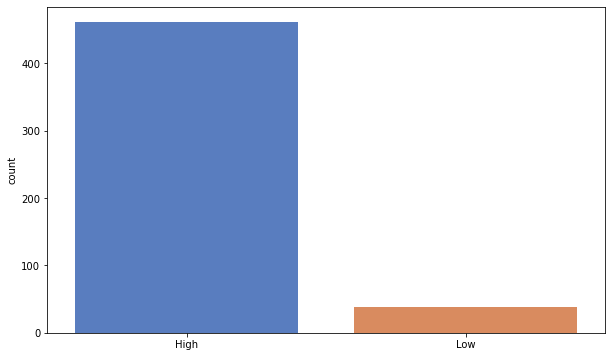

In [126]:
[(i, category.count(i)) for i in set(category)]
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

**Heatmap**

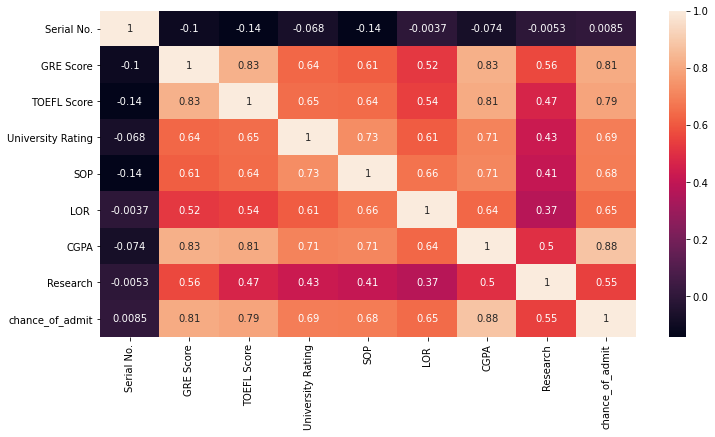

In [127]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [128]:
df1=df.drop(['Serial No.', 'University Rating','Research','chances'], axis=1)

**Boxplot**

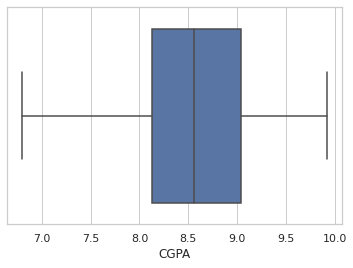

In [138]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["CGPA"])

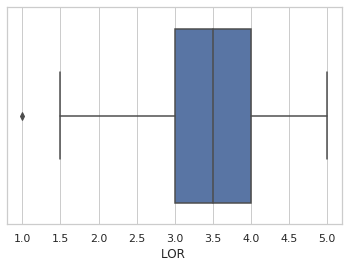

In [137]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["LOR "])

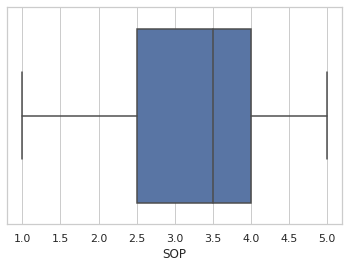

In [135]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["SOP"])

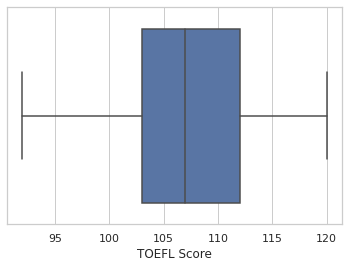

In [134]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["TOEFL Score"])

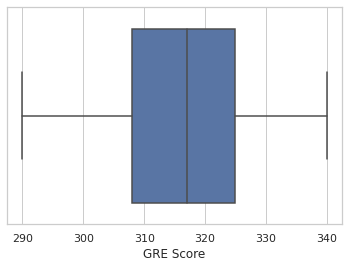

In [133]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["GRE Score"])

**Histogram**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1.hist (bins=10,figsize=(20,20))
plt.show ()

**Pairplot**

In [ ]:
sns.pairplot(df1)

**Countplot**

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.countplot('University Rating',data=df )
plt.tight_layout()
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.countplot('Research',data=df )
plt.tight_layout()
plt.show()

**Distplot**

In [ ]:
ax = sns.distplot(df['chance_of_admit'], rug=True, hist=True)

In [ ]:
df1.head(1)

**Violinplot**

In [ ]:
ax = sns.violinplot(x="University Rating", y="chance_of_admit", data=df, palette="muted")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [ ]:
x = df.iloc[:, 1:8] 
y=df['chances'].astype(int)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [ ]:
seed=7
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',SVC()))
models.append(('LR',LogisticRegression()))
models.append(('NB',GaussianNB()))
# Evaluating each models in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

**Logistic Regression**

In [ ]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')

**Support vector machine**

In [ ]:
classifier=SVC()
classifier.fit(x_train,y_train)
svm_predict=classifier.predict(x_test)
print(classification_report(y_test,svm_predict))
accuracy2=classifier.score(x_test,y_test)
print(accuracy2*100,'%')

**Random forest classifier**

In [ ]:
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')